In [3]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import copy
from math import sqrt

In [5]:
# Draw the hexagon
def regular_hexagon (x, y, n):
    l1 = y <= sqrt(3)*x/3 + (1-sqrt(3)/6)*n + (1-sqrt(3)/3)
    l2 = y <= -sqrt(3)*x/3 + (1+sqrt(3)/6)*n + (1+sqrt(3)/3)
    l3 = y >= -sqrt(3)*x/3 + sqrt(3)/6*n + (1+sqrt(3)/3)
    l4 = y >= sqrt(3)*x/3 - sqrt(3)/6*n + (1-sqrt(3)/3)
    l5 = x >= (0.5-sqrt(3)/4)*n + 1
    l6 = x <= (0.5+sqrt(3)/4)*n + 1
    return l1&l2&l3&l4&l5&l6

# Jacobi Relaxation

In [6]:
def jacobi_relaxation(bound_jr):
    iterations=0
    phi_here=copy.deepcopy(phi_initial) # pay attention to the difference between copy and deepcopy, google it 
    while True:
        iterations+=1
        phi_new=copy.deepcopy(phi_here)  #set phi_new
        for i in range(1,N+2):
            for j in range(1,N+2): # simulate all N-2*N-2 sites using discretized poisson equation, no simulation for boundary 
                left_index=j-h
                right_index=j+h
                up_index=i+h
                down_index=i-h
                phi_new[i,j]=(1/(2*d))*(phi_here[up_index, j]+phi_here[down_index, j]+phi_here[i, right_index]+phi_here[i, left_index])+(h**2/(2*d*epsilon))*rho[i,j] 
        max_delta=np.max(np.abs(phi_new-phi_here)) # compute delta_phi
        if max_delta <= bound_jr:
            break
        else:
            phi_here=copy.deepcopy(phi_new)
       # print(iterations,max_delta)
    return iterations,phi_new

## N=10

In [7]:
# Set parameters
N = 10
d = 2
h = 1
epsilon = 1
rho = np.zeros((N+3, N+3))

# Draw the hexagon
for i in range (0, N+3):
    for j in range (0, N+3):
        if regular_hexagon (i, j, N):
            rho[i, j] = 1

phi_initial = np.zeros((N+3, N+3))

In [9]:
iterations_jr_10, phi_jr = jacobi_relaxation(0.0001)

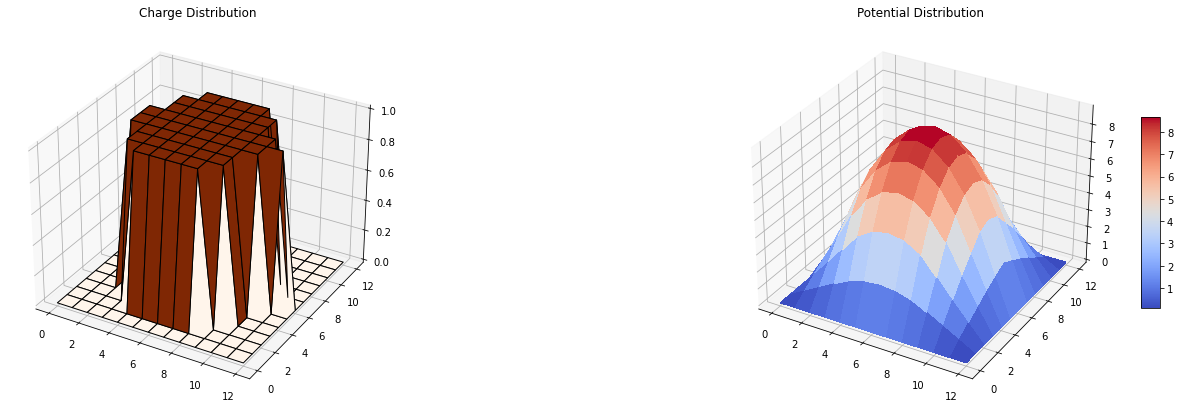

In [10]:
if __name__ == '__main__':
    # Plot
    fig_jr=plt.figure(figsize=(24,7))
    ax1_jr = fig_jr.add_subplot(1, 2, 1, projection='3d')
    X1 = np.arange(0,N+3)
    Y1 = np.arange(0,N+3)
    X1, Y1 = np.meshgrid(X1, Y1)
    Z1_jr = rho[0:N+3,0:N+3]
    surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1,cstride=1, cmap = plt.cm.get_cmap('Oranges', 2), linewidth = 1, antialiased = True, edgecolors='black')
    ax1_jr.set_title('Charge Distribution')

    ax3_jr = fig_jr.add_subplot(1, 2, 2, projection='3d')
    Z3_jr = phi_jr[0:N+3,0:N+3]
    surf3_jr = ax3_jr.plot_surface(X1, Y1, Z3_jr, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax3_jr.set_title('Potential Distribution')
    fig_jr.colorbar(surf3_jr, shrink=0.5, aspect=10)

## N=20

In [11]:
# Set parameters
N = 20
d = 2
h = 1
epsilon = 1
rho = np.zeros((N+3, N+3))

# Draw the hexagon
for i in range (0, N+3):
    for j in range (0, N+3):
        if regular_hexagon (i, j, N):
            rho[i, j] = 1

phi_initial = np.zeros((N+3, N+3))

In [12]:
iterations_jr_20, phi_jr = jacobi_relaxation(0.0001)

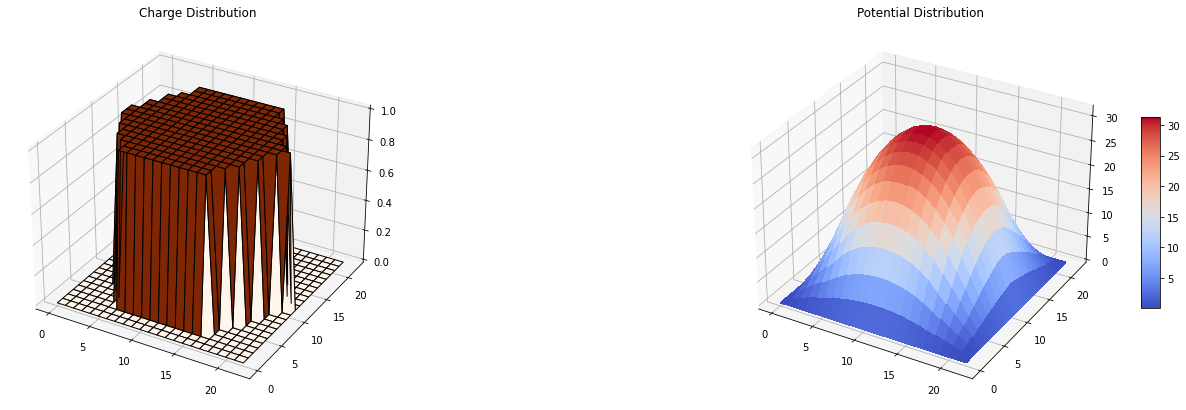

In [13]:
if __name__ == '__main__':
    # Plot
    fig_jr=plt.figure(figsize=(24,7))
    ax1_jr = fig_jr.add_subplot(1, 2, 1, projection='3d')
    X1 = np.arange(0,N+3)
    Y1 = np.arange(0,N+3)
    X1, Y1 = np.meshgrid(X1, Y1)
    Z1_jr = rho[0:N+3,0:N+3]
    surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1,cstride=1, cmap = plt.cm.get_cmap('Oranges', 2), linewidth = 1, antialiased = True, edgecolors='black')
    ax1_jr.set_title('Charge Distribution')

    ax3_jr = fig_jr.add_subplot(1, 2, 2, projection='3d')
    Z3_jr = phi_jr[0:N+3,0:N+3]
    surf3_jr = ax3_jr.plot_surface(X1, Y1, Z3_jr, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax3_jr.set_title('Potential Distribution')
    fig_jr.colorbar(surf3_jr, shrink=0.5, aspect=10)

## N=40

In [14]:
# Set parameters
N = 40
d = 2
h = 1
epsilon = 1
rho = np.zeros((N+3, N+3))

# Draw the hexagon
for i in range (0, N+3):
    for j in range (0, N+3):
        if regular_hexagon (i, j, N):
            rho[i, j] = 1

phi_initial = np.zeros((N+3, N+3))

In [15]:
iterations_jr_40, phi_jr = jacobi_relaxation(0.0001)

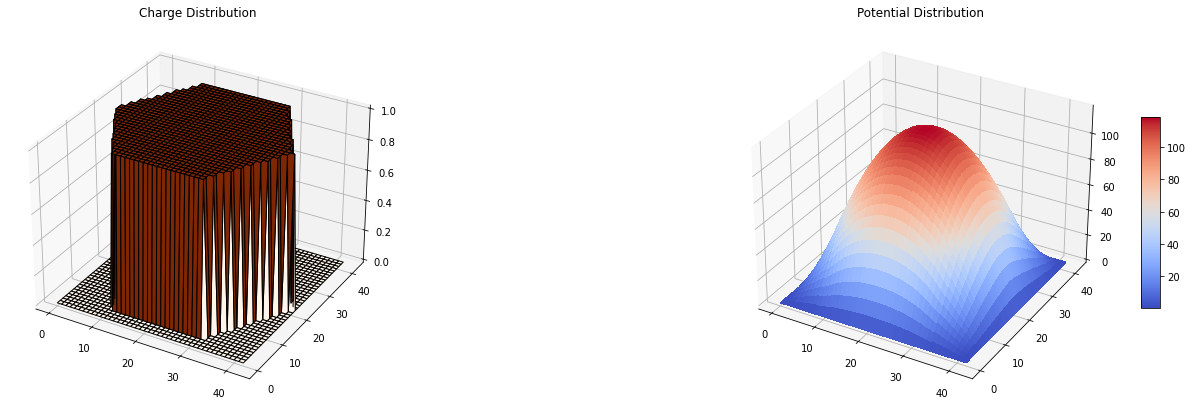

In [16]:
if __name__ == '__main__':
    # Plot
    fig_jr=plt.figure(figsize=(24,7))
    ax1_jr = fig_jr.add_subplot(1, 2, 1, projection='3d')
    X1 = np.arange(0,N+3)
    Y1 = np.arange(0,N+3)
    X1, Y1 = np.meshgrid(X1, Y1)
    Z1_jr = rho[0:N+3,0:N+3]
    surf1_jr = ax1_jr.plot_surface(X1, Y1, Z1_jr, rstride=1,cstride=1, cmap = plt.cm.get_cmap('Oranges', 2), linewidth = 1, antialiased = True, edgecolors='black')
    ax1_jr.set_title('Charge Distribution')

    ax3_jr = fig_jr.add_subplot(1, 2, 2, projection='3d')
    Z3_jr = phi_jr[0:N+3,0:N+3]
    surf3_jr = ax3_jr.plot_surface(X1, Y1, Z3_jr, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax3_jr.set_title('Potential Distribution')
    fig_jr.colorbar(surf3_jr, shrink=0.5, aspect=10)

## Compare the numerical result of iterations to the theoretical prediction

### Numerical result

In [19]:
iterations_jr_10

233

In [20]:
iterations_jr_20

796

In [21]:
iterations_jr_40

2921

### Theoretical prediction

Iterations$\approx\frac{1}{2}pN_s$

iterations_jr_10 = 200

iterations_jr_20 = 800

iterations_jr_40 = 3200

### Compare

In [2]:
N = [10, 20, 40]
jr_num = [233, 796, 2921]
jr_theo = [200, 800, 3200]

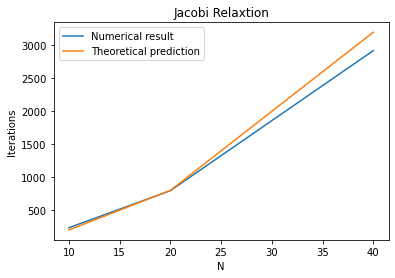

In [9]:
plt.figure()
plt.plot(N, jr_num, label="Numerical result")
plt.plot(N, jr_theo, label="Theoretical prediction")
plt.xlabel("N")
plt.ylabel("Iterations")
plt.title("Jacobi Relaxtion")
plt.legend()
plt.show()

# Gauss-Seidel Relaxation

In [22]:
def gauss_seidel_relaxation(bound_here):
    iterations=0
    phi_new=copy.deepcopy(phi_initial)
    while True:
        iterations+=1
        max_delta=0
        for i in range(1,N+2):
            for j in range(1,N+2): # simulate all N-2*N-2 sites using discretized poisson equation, no simulation for boundary 
                left_index=j-h
                right_index=j+h
                up_index=i+h
                down_index=i-h
                phi_point_new=(1/(2*d))*(phi_new[up_index, j]+phi_new[down_index, j]+phi_new[i, right_index]
                                              +phi_new[i, left_index])+(h**2/(2*d*epsilon))*rho[i,j] #new point
                max_delta=max(max_delta,np.abs(phi_new[i, j]-phi_point_new))  #delta_phi
                phi_new[i,j]=phi_point_new #update point
        if max_delta <= bound_here:
            break
    return iterations,phi_new

## N=10

In [23]:
# Set parameters
N = 10
d = 2
h = 1
epsilon = 1
rho = np.zeros((N+3, N+3))
for i in range (0, N+3):
    for j in range (0, N+3):
        if regular_hexagon (i, j, N):
            rho[i, j] = 1
phi_initial = np.zeros((N+3, N+3))

In [24]:
iterations_gs_10,phi_gs=gauss_seidel_relaxation(0.0001)

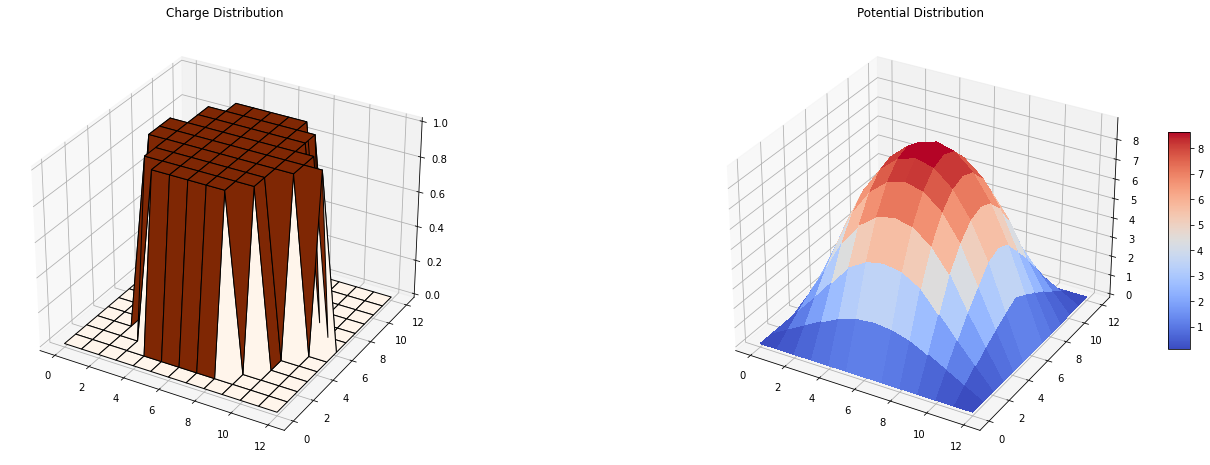

In [26]:
if __name__ == '__main__':
    # Plot
    fig_gs=plt.figure(figsize=(24,8))
    ax1_gs = fig_gs.add_subplot(1, 2, 1, projection='3d')
    X1 = np.arange(0,N+3)
    Y1 = np.arange(0,N+3)
    X1, Y1 = np.meshgrid(X1, Y1)
    Z1_gs = rho[0:N+3,0:N+3]
    surf1_gs = ax1_gs.plot_surface(X1, Y1, Z1_gs, rstride=1, cstride=1, cmap = plt.cm.get_cmap('Oranges', 2), linewidth = 1, antialiased = True, edgecolors='black')
    ax1_gs.set_title('Charge Distribution')

    ax3_gs = fig_gs.add_subplot(1, 2, 2, projection='3d')
    Z3_gs = phi_gs[0:N+3,0:N+3]
    surf3_gs = ax3_gs.plot_surface(X1, Y1, Z3_gs, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax3_gs.set_title('Potential Distribution')
    fig_gs.colorbar(surf3_gs, shrink=0.5, aspect=10)

## N=20

In [27]:
# Set parameters
N = 20
d = 2
h = 1
epsilon = 1
rho = np.zeros((N+3, N+3))
for i in range (0, N+3):
    for j in range (0, N+3):
        if regular_hexagon (i, j, N):
            rho[i, j] = 1
phi_initial = np.zeros((N+3, N+3))

In [28]:
iterations_gs_20,phi_gs=gauss_seidel_relaxation(0.0001)

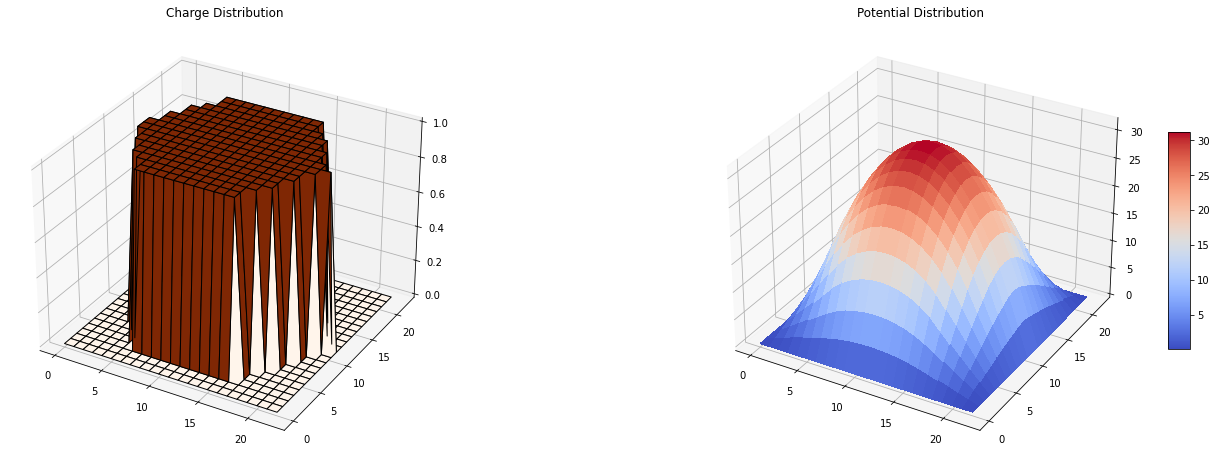

In [29]:
if __name__ == '__main__':
    # Plot
    fig_gs=plt.figure(figsize=(24,8))
    ax1_gs = fig_gs.add_subplot(1, 2, 1, projection='3d')
    X1 = np.arange(0,N+3)
    Y1 = np.arange(0,N+3)
    X1, Y1 = np.meshgrid(X1, Y1)
    Z1_gs = rho[0:N+3,0:N+3]
    surf1_gs = ax1_gs.plot_surface(X1, Y1, Z1_gs, rstride=1, cstride=1, cmap = plt.cm.get_cmap('Oranges', 2), linewidth = 1, antialiased = True, edgecolors='black')
    ax1_gs.set_title('Charge Distribution')

    ax3_gs = fig_gs.add_subplot(1, 2, 2, projection='3d')
    Z3_gs = phi_gs[0:N+3,0:N+3]
    surf3_gs = ax3_gs.plot_surface(X1, Y1, Z3_gs, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax3_gs.set_title('Potential Distribution')
    fig_gs.colorbar(surf3_gs, shrink=0.5, aspect=10)

## N=40

In [30]:
# Set parameters
N = 40
d = 2
h = 1
epsilon = 1
rho = np.zeros((N+3, N+3))
for i in range (0, N+3):
    for j in range (0, N+3):
        if regular_hexagon (i, j, N):
            rho[i, j] = 1
phi_initial = np.zeros((N+3, N+3))

In [31]:
iterations_gs_40,phi_gs=gauss_seidel_relaxation(0.0001)

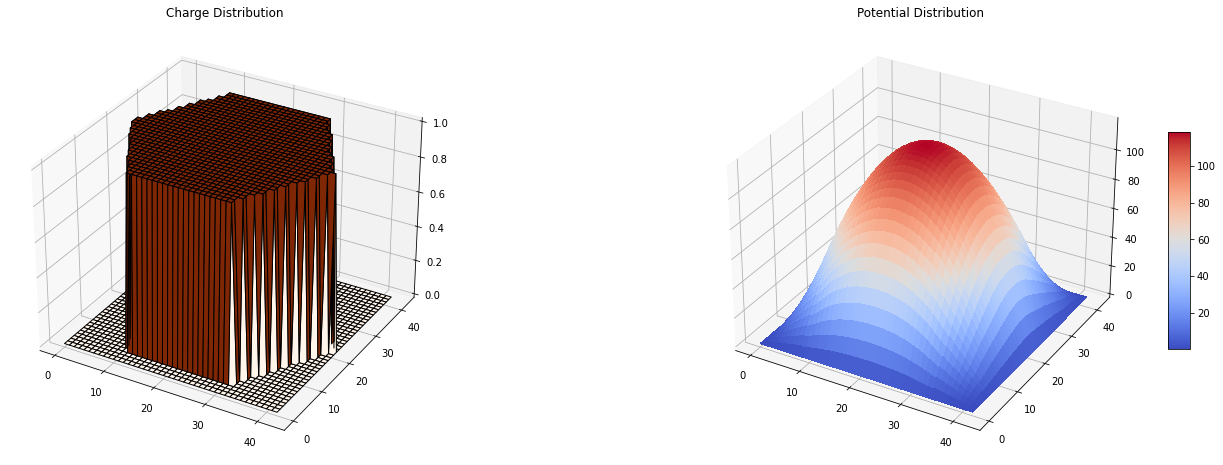

In [32]:
if __name__ == '__main__':
    # Plot
    fig_gs=plt.figure(figsize=(24,8))
    ax1_gs = fig_gs.add_subplot(1, 2, 1, projection='3d')
    X1 = np.arange(0,N+3)
    Y1 = np.arange(0,N+3)
    X1, Y1 = np.meshgrid(X1, Y1)
    Z1_gs = rho[0:N+3,0:N+3]
    surf1_gs = ax1_gs.plot_surface(X1, Y1, Z1_gs, rstride=1, cstride=1, cmap = plt.cm.get_cmap('Oranges', 2), linewidth = 1, antialiased = True, edgecolors='black')
    ax1_gs.set_title('Charge Distribution')

    ax3_gs = fig_gs.add_subplot(1, 2, 2, projection='3d')
    Z3_gs = phi_gs[0:N+3,0:N+3]
    surf3_gs = ax3_gs.plot_surface(X1, Y1, Z3_gs, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax3_gs.set_title('Potential Distribution')
    fig_gs.colorbar(surf3_gs, shrink=0.5, aspect=10)

## Compare the numerical result of iterations to the theoretical prediction

### Numerical result

In [34]:
iterations_gs_10

128

In [35]:
iterations_gs_20

432

In [36]:
iterations_gs_40

1585

### Theoretical prediction

Iterations$\approx\frac{1}{4}pN_s$

iterations_gs_10 = 100

iterations_gs_20 = 400

iterations_gs_40 = 1600

### Compare

In [10]:
N = [10, 20, 40]
gs_num = [128, 432, 1585]
gs_theo = [100, 400, 1600]

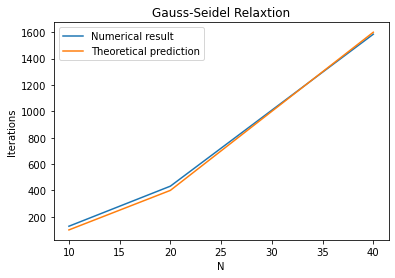

In [11]:
plt.figure()
plt.plot(N, gs_num, label="Numerical result")
plt.plot(N, gs_theo, label="Theoretical prediction")
plt.xlabel("N")
plt.ylabel("Iterations")
plt.title("Gauss-Seidel Relaxtion")
plt.legend()
plt.show()

# Success Overrelaxation

In [37]:
def sor(bound_here):
    iterations=0
    phi_new=copy.deepcopy(phi_initial)
    rhere=np.cos(np.pi/(N+1))
    w_opt=2/(1+np.sqrt(1-rhere**2))
    #print(w_opt)
    while True:
        iterations+=1
        max_delta=0
        for i in range(1,N+2):
            for j in range(1,N+2): # simulate all N-2*N-2 sites using discretized poisson equation, no simulation for boundary 
                left_index=j-h
                right_index=j+h
                up_index=i+h
                down_index=i-h
                phi_point_new=(1-w_opt)*phi_new[i,j]+w_opt*((1/(2*d))*(phi_new[up_index, j]+phi_new[down_index, j]+phi_new[i, right_index]+phi_new[i, left_index])+(h**2/(2*d*epsilon))*rho[i,j]) #new point
                max_delta=max(max_delta,np.abs(phi_new[i,j]-phi_point_new))  #delta_phi
                phi_new[i,j]=phi_point_new #update point
        if max_delta <= bound_here:
            break
        #print(iterations,max_delta)
    return iterations,phi_new

## N=10

In [38]:
# Set parameters
N = 10
d = 2
h = 1
epsilon = 1
rho = np.zeros((N+3, N+3))
for i in range (0, N+3):
    for j in range (0, N+3):
        if regular_hexagon (i, j, N):
            rho[i, j] = 1
phi_initial = np.zeros((N+3, N+3))

In [39]:
iterations_sor_10,phi_sor=sor(0.0001)

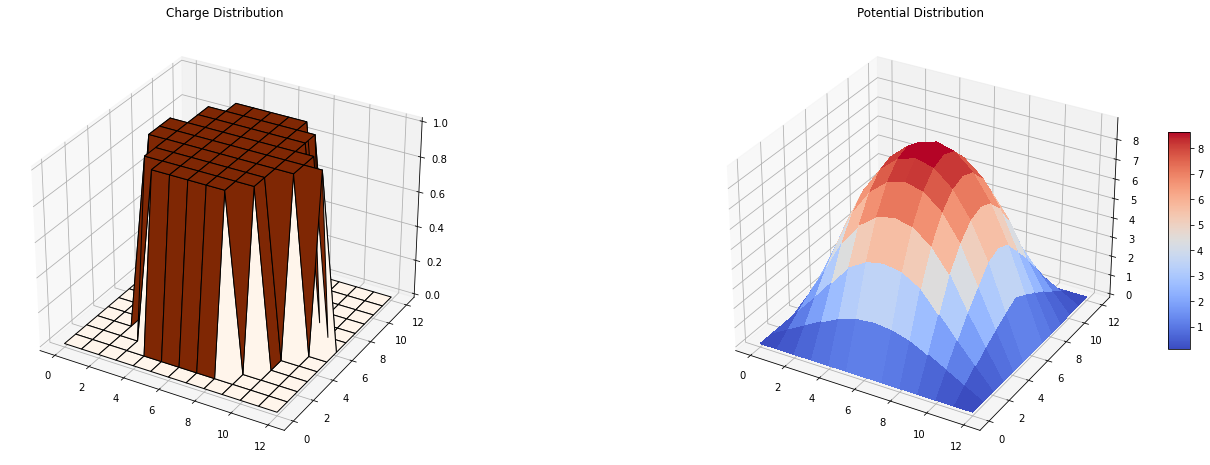

In [40]:
if __name__ == '__main__':
    # Plot
    fig_sor=plt.figure(figsize=(24,8))
    ax1_sor = fig_sor.add_subplot(1, 2, 1, projection='3d')
    X1 = np.arange(0,N+3)
    Y1 = np.arange(0,N+3)
    X1, Y1 = np.meshgrid(X1, Y1)
    Z1_sor = rho[0:N+3,0:N+3]
    surf1_sor = ax1_sor.plot_surface(X1, Y1, Z1_sor, rstride=1, cstride=1, cmap = plt.cm.get_cmap('Oranges', 2), linewidth = 1, antialiased = True, edgecolors='black')
    ax1_sor.set_title('Charge Distribution')

    ax3_sor = fig_sor.add_subplot(1, 2, 2, projection='3d')
    Z3_sor = phi_sor[0:N+3,0:N+3]
    surf3_sor = ax3_sor.plot_surface(X1, Y1, Z3_sor, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax3_sor.set_title('Potential Distribution')
    fig_sor.colorbar(surf3_sor, shrink=0.5, aspect=10)

## N=20

In [41]:
# Set parameters
N = 20
d = 2
h = 1
epsilon = 1
rho = np.zeros((N+3, N+3))
for i in range (0, N+3):
    for j in range (0, N+3):
        if regular_hexagon (i, j, N):
            rho[i, j] = 1
phi_initial = np.zeros((N+3, N+3))

In [42]:
iterations_sor_20,phi_sor=sor(0.0001)

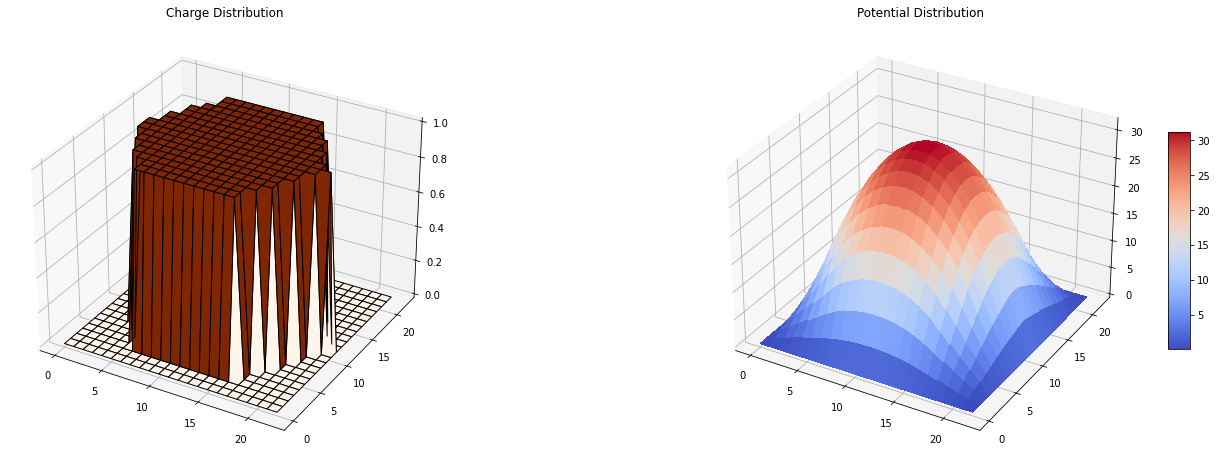

In [43]:
if __name__ == '__main__':
    # Plot
    fig_sor=plt.figure(figsize=(24,8))
    ax1_sor = fig_sor.add_subplot(1, 2, 1, projection='3d')
    X1 = np.arange(0,N+3)
    Y1 = np.arange(0,N+3)
    X1, Y1 = np.meshgrid(X1, Y1)
    Z1_sor = rho[0:N+3,0:N+3]
    surf1_sor = ax1_sor.plot_surface(X1, Y1, Z1_sor, rstride=1, cstride=1, cmap = plt.cm.get_cmap('Oranges', 2), linewidth = 1, antialiased = True, edgecolors='black')
    ax1_sor.set_title('Charge Distribution')

    ax3_sor = fig_sor.add_subplot(1, 2, 2, projection='3d')
    Z3_sor = phi_sor[0:N+3,0:N+3]
    surf3_sor = ax3_sor.plot_surface(X1, Y1, Z3_sor, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax3_sor.set_title('Potential Distribution')
    fig_sor.colorbar(surf3_sor, shrink=0.5, aspect=10)

## N=40

In [44]:
# Set parameters
N = 40
d = 2
h = 1
epsilon = 1
rho = np.zeros((N+3, N+3))
for i in range (0, N+3):
    for j in range (0, N+3):
        if regular_hexagon (i, j, N):
            rho[i, j] = 1
phi_initial = np.zeros((N+3, N+3))

In [45]:
iterations_sor_40,phi_sor=sor(0.0001)

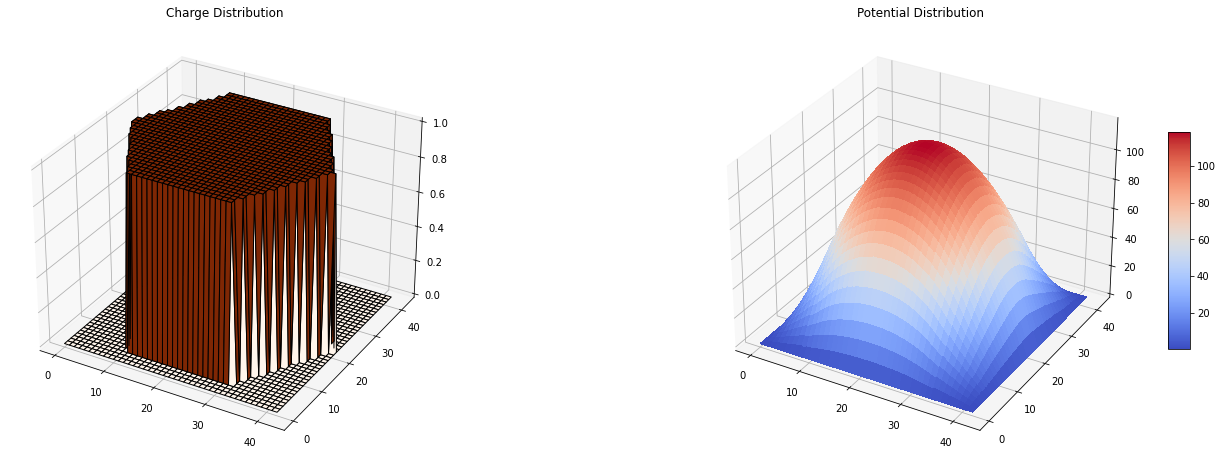

In [46]:
if __name__ == '__main__':
    # Plot
    fig_sor=plt.figure(figsize=(24,8))
    ax1_sor = fig_sor.add_subplot(1, 2, 1, projection='3d')
    X1 = np.arange(0,N+3)
    Y1 = np.arange(0,N+3)
    X1, Y1 = np.meshgrid(X1, Y1)
    Z1_sor = rho[0:N+3,0:N+3]
    surf1_sor = ax1_sor.plot_surface(X1, Y1, Z1_sor, rstride=1, cstride=1, cmap = plt.cm.get_cmap('Oranges', 2), linewidth = 1, antialiased = True, edgecolors='black')
    ax1_sor.set_title('Charge Distribution')

    ax3_sor = fig_sor.add_subplot(1, 2, 2, projection='3d')
    Z3_sor = phi_sor[0:N+3,0:N+3]
    surf3_sor = ax3_sor.plot_surface(X1, Y1, Z3_sor, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
    ax3_sor.set_title('Potential Distribution')
    fig_sor.colorbar(surf3_sor, shrink=0.5, aspect=10)

## Compare the numerical result of iterations to the theoretical prediction

### Numerical result

In [48]:
iterations_sor_10

34

In [49]:
iterations_sor_20

61

In [50]:
iterations_sor_40

116

### Theoretical prediction

Iterations$\approx\frac{1}{3}p\sqrt{N_s}$

iterations_sor_10 = 14

iterations_sor_20 = 28

iterations_sor_40 = 56

### Compare

In [12]:
N = [10, 20, 40]
sor_num = [34, 61, 116]
sor_theo = [14, 28, 56]

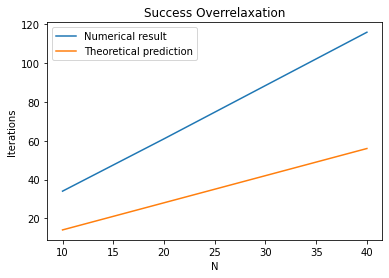

In [13]:
plt.figure()
plt.plot(N, sor_num, label="Numerical result")
plt.plot(N, sor_theo, label="Theoretical prediction")
plt.xlabel("N")
plt.ylabel("Iterations")
plt.title("Success Overrelaxation")
plt.legend()
plt.show()

They have same tendency